# Annual Temperature Graphs
## Written By Jared Rennie (@jjrennie)

In this notebook, you will learn how to make an annual temperature graph, much like one you see <a href='https://twitter.com/jjrennie/status/1728857989464179169' target="_blank">here</a>:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">A month in left in 2023, but Ely, Nevada and Little Rock, Arkansas currently have the coldest and warmest stations in the United States, when looking at anomalies (departure from their 1991-2020 means). <br><br>Ely, NV: -3.1F<br>Little Rock: +4.5F<a href="https://twitter.com/hashtag/NVwx?src=hash&amp;ref_src=twsrc%5Etfw">#NVwx</a> <a href="https://twitter.com/hashtag/ARwx?src=hash&amp;ref_src=twsrc%5Etfw">#ARwx</a> <a href="https://t.co/iSxhwNoCkX">pic.twitter.com/iSxhwNoCkX</a></p>&mdash; Jared Rennie (@jjrennie) <a href="https://twitter.com/jjrennie/status/1728857989464179169?ref_src=twsrc%5Etfw">November 26, 2023</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

We will utilize a stations maximum and minimum temperature for it's period of record. While we are only highlighting a specific year, we can utilize the period of record to get other useful information, like extremes and normals. Data originates from <a href='https://www.ncei.noaa.gov' target="_blank">NOAA NCEI</a>, who holds all of the worlds weather data. This code will show you how to access the data via an API, clean it up some, and plot a pretty graphic. 

### What You Need

First off, the entire codebase works in Python 3. In addition to base Python, you will need the following packages installed: 
- requests (to access the api)
- pandas (to slice annd dice the data)
- matplotlib (to plot!)
    
The "easiest" way is to install these is by installing <a href='https://www.anaconda.com' target="_blank">anaconda</a>, and then applying <a href='https://conda-forge.org/' target="_blank">conda-forge</a>. Afterward, then you can install the above packages. 

### Importing Packages
Assuming you did the above, it should (in theory) import everything no problem:

In [1]:
# Import packages
%matplotlib inline
import json,requests,sys,calendar
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print("SUCCESS!")

SUCCESS!


If you made it this far, great!

### Insert Arguments
To access the data, we will be utilizing the <a href='https://www.rcc-acis.org/docs_webservices.html' target='blank'>ACIS API</a>, which is a quick and easy way to access our station data without having to download it yourself. Now we need to know what station to get data for. The ACIS API accepts all sorts of IDs, including:

- FAA (i.e. AVL)
- ghcn (i.e. USW00003812)
- ThreadEx (i.e. AVLthr)

If you're not sure, you can refer to the API documentation above. We also need to know which year we want to plot. And finally, need to give you credit for the image that is created at the end. 

 **Change the arguments below to your liking**

In [2]:
# Insert Arguments Here
stationID = 'BOS'
plotYear=2014
author='Not Jared Rennie'

The rest of the code should work without making any changes to it, but if you're interested, keep on reading to see how the sausage is made.

This next block of code will attempt to access the data we want from the ACIS API. Specifically, we are getting daily maximum and minimum temperature for the stations period of record, as well as the 1991-2020 normal for each day of the year. The API is publicly available, but sometimes there are hiccups when getting the data. We tried to account for this with a try/exept in this code block and it will let you know if it fails after 3 seconds. If this happens, wait a minute, then try again.

In [3]:
# Build JSON to access ACIS API (from https://www.rcc-acis.org/docs_webservices.html)
acis_url = 'http://data.rcc-acis.org/StnData'
payload = {
"output": "json",
"params": {"elems":[{"name":"maxt","interval":"dly","prec":1},
                    {"name":"mint","interval":"dly","prec":1},
                    {"name":"maxt","interval":"dly","normal":"1","prec":1},
                    {"name":"mint","interval":"dly","normal":"1","prec":1}],
           "sid":stationID,
           "sdate":"por",
           "edate":"por"
          } 
}

# Make Request
try:
    r = requests.post(acis_url, json=payload,timeout=3)
    acisData = r.json()
    print("SUCCESS!")
except Exception as e:
    sys.exit('\nSomething Went Wrong With Accessing API after 3 seconds, Try Again')

SUCCESS!


If it says "SUCCESS!" then congrats you got the data!

### Let's check the data!
How does it look? Well the data comes back as a JSON, which can be a little confusing to look at, so let's extract the information we need, and reorganize it a bit.

First, the JSON has a 'meta' key and a 'data' key. The 'meta' key gets us info like station name, latitude, longitude, etc. And 'data' is the actual data we requested. So let's get some station info, and convert the data into a pandas dataframe, which makes it easier to see. 

In [4]:
# Get Station Info
stationName=acisData['meta']['name'].title()
stationState=acisData['meta']['state']

# Convert data into Pandas DataFrame
acisPandas = pd.DataFrame(acisData['data'], columns=['Date','TmaxVal','TminVal','TmaxNormal','TminNormal'])

print("\nSuccessfully Orgainzed Data for: ",stationName,',',stationState)
print(acisPandas)


Successfully Orgainzed Data for:  Boston Logan International Airport , MA
             Date TmaxVal TminVal TmaxNormal TminNormal
0      1936-01-01    35.0    21.0       38.3       25.2
1      1936-01-02    35.0    21.0       38.2       25.0
2      1936-01-03    54.0    35.0       38.0       24.8
3      1936-01-04    46.0    35.0       37.8       24.5
4      1936-01-05    43.0    33.0       37.6       24.3
...           ...     ...     ...        ...        ...
32121  2023-12-11    64.0    37.0       43.4       30.5
32122  2023-12-12    44.0    34.0       43.1       30.2
32123  2023-12-13    45.0    32.0       42.9       29.9
32124  2023-12-14    36.0    28.0       42.6       29.7
32125  2023-12-15    56.0    32.0       42.3       29.4

[32126 rows x 5 columns]


You'll see there's a column for the date, and then 4 values. There's the recorded max/min for a given day, and then the day's max/min normal. Every decade, NCEI produces <a href='https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals' target="_blank">30 year normals</a> which shows what temperatures typically happen for a given day. The normals used at the time of writing utilze the 1991-2020 normals period. This is actually a good reference to weather versus climate. TmaxNormal/TminNormal are what you expect (climate) but TmaxVal and TminVal are what you get (weather).

Sometimes people want to know what the station's period of record is, so let's get that info. 

In [5]:
stationStart=acisPandas.iloc[[0]]['Date'].values[0][0:4]
stationEnd=acisPandas.iloc[[-1]]['Date'].values[0][0:4]
print("Period of Record: ",stationStart,"-",stationEnd)

Period of Record:  1936 - 2023


### Slicing and Dicing the data
Now that we have the data we need, we need to do a few things before we can plot the data. First, we will need to remove any missing data. ACIS defines missing data as 'M', so let's get rid of any of these instances. Also, we read in the data as a string, we will need to convert the date into a python-ic 'datetime' and temperature data into a number in order to plot the data appropriately.  

In [6]:
# Remove Missing Data And Reformat Each Column
for (columnName, columnData) in acisPandas.items():
    acisPandas = acisPandas[acisPandas[columnName] != 'M']
    if columnName == 'Date':
        acisPandas[columnName] = pd.to_datetime(acisPandas[columnName])
    else:
        acisPandas[columnName] = pd.to_numeric(acisPandas[columnName])
lastDate=acisPandas.iloc[-1]['Date']
print(acisPandas)

            Date  TmaxVal  TminVal  TmaxNormal  TminNormal
0     1936-01-01     35.0     21.0        38.3        25.2
1     1936-01-02     35.0     21.0        38.2        25.0
2     1936-01-03     54.0     35.0        38.0        24.8
3     1936-01-04     46.0     35.0        37.8        24.5
4     1936-01-05     43.0     33.0        37.6        24.3
...          ...      ...      ...         ...         ...
32121 2023-12-11     64.0     37.0        43.4        30.5
32122 2023-12-12     44.0     34.0        43.1        30.2
32123 2023-12-13     45.0     32.0        42.9        29.9
32124 2023-12-14     36.0     28.0        42.6        29.7
32125 2023-12-15     56.0     32.0        42.3        29.4

[32119 rows x 5 columns]


Not much changed when looking at the data again, but this is ging to help us out with the next few steps.

While we had an input for plotting a particular year, it would be nice to see what the 'extremes' were for a given day (ie the highest max temperature ever recorded for a given day). In order to acheive this, we need to add some extra columns to the dataframe. Specifically, we want the day of the year so we can tell pandas to aggregate based upon that axis. This code block achieves that.

You'll also note that we are doing two kinds of extremes... more on this later.

In [7]:
# Get Extremes of Tmax/Tmin for each day
acisPandas['Year'] = acisPandas['Date'].dt.year
acisPandas['DayOfYear'] = acisPandas['Date'].dt.dayofyear
acisExtremes1 = acisPandas.groupby(['DayOfYear']).agg({'TmaxVal': 'max', 'TminVal': 'min'}).reset_index()
acisExtremes2 = acisPandas.groupby(['DayOfYear']).agg({'TmaxVal': 'min', 'TminVal': 'max'}).reset_index()
print(acisExtremes1)
print(acisExtremes2)

     DayOfYear  TmaxVal  TminVal
0            1     61.0      0.0
1            2     61.0      2.0
2            3     64.0      2.0
3            4     64.0     -4.0
4            5     63.0     -4.0
..         ...      ...      ...
361        362     63.0      5.0
362        363     63.0      2.0
363        364     73.0     -3.0
364        365     63.0     -4.0
365        366     59.0      5.0

[366 rows x 3 columns]
     DayOfYear  TmaxVal  TminVal
0            1     13.0     46.0
1            2     19.0     52.0
2            3     14.0     44.0
3            4     12.0     55.0
4            5     19.0     48.0
..         ...      ...      ...
361        362     12.0     40.0
362        363     14.0     44.0
363        364     17.0     53.0
364        365      9.0     48.0
365        366     22.0     37.0

[366 rows x 3 columns]


Ok, now for the elephant in the room: <b>LEAP DAYS</b>

In order to sync everything up, we need to consider February 29th, which only happens once every 4 years. If not taken care of properly, the resulting plot may not be exactly right. So the logic we are going to apply is the following: if it's NOT a leap year, remove all instances of February 29th (normals, extremes, raw data) so that everything matches when plotting.  

In [8]:
# Get Data for Year Given as Input, and take care of leap day.
# Also need a full year for plotting other data, so use a complete year (ie 2020)
normalData=acisPandas[acisPandas['Year']==2016]

if not calendar.isleap(plotYear):
    acisExtremes1=acisExtremes1.drop(acisExtremes1[acisExtremes1['DayOfYear'] == 60].index).reset_index(drop=True)
    acisExtremes1['DayOfYear'] = range(1, 366)

    acisExtremes2=acisExtremes2.drop(acisExtremes2[acisExtremes2['DayOfYear'] == 60].index).reset_index(drop=True)
    acisExtremes2['DayOfYear'] = range(1, 366)

    normalData=normalData.drop(normalData[normalData['DayOfYear'] == 60].index).reset_index(drop=True)
    normalData['DayOfYear'] = range(1, 366)

Ok one more item we'd like to plot. We want to know if a given day in the plot year met or exceeded a tmax/tmin extreme. For example, was it the hottest/coldest ever for a given day? And in some cases, we also want to know the opposite information (was it the coldest high temperature? warmest low temperature)? We ran two extremes calls above for this very reason. 

Now this block of code will give us the year's worth of data we want to plot, and check to see if it tied/broke records.

In [9]:
# Find Days in the plot year that either tied or broke a record.
plotData=acisPandas[acisPandas['Year']==plotYear].reset_index(drop=True)
highMax = plotData[plotData['TmaxVal'] >= acisExtremes1[0:len(plotData)]['TmaxVal']]
lowMin = plotData[plotData['TminVal'] <= acisExtremes1[0:len(plotData)]['TminVal']]
lowMax = plotData[plotData['TmaxVal'] <= acisExtremes2[0:len(plotData)]['TmaxVal']]
highMin = plotData[plotData['TminVal'] >= acisExtremes2[0:len(plotData)]['TminVal']]

print(highMax)

          Date  TmaxVal  TminVal  TmaxNormal  TminNormal  Year  DayOfYear
32  2014-02-02     55.0     31.0        36.9        22.6  2014         33
270 2014-09-28     87.0     60.0        68.6        53.8  2014        271
334 2014-12-01     64.0     39.0        46.4        33.3  2014        335


Now for the fun part...

### Plotting the data!

This last block of code will plot the data. Feel free to play around and adjust colors and settings to your liking. One additional thing this block does is create 2 different y-axis, one for Fahrenheit and one for Celsius.

PLOTTING


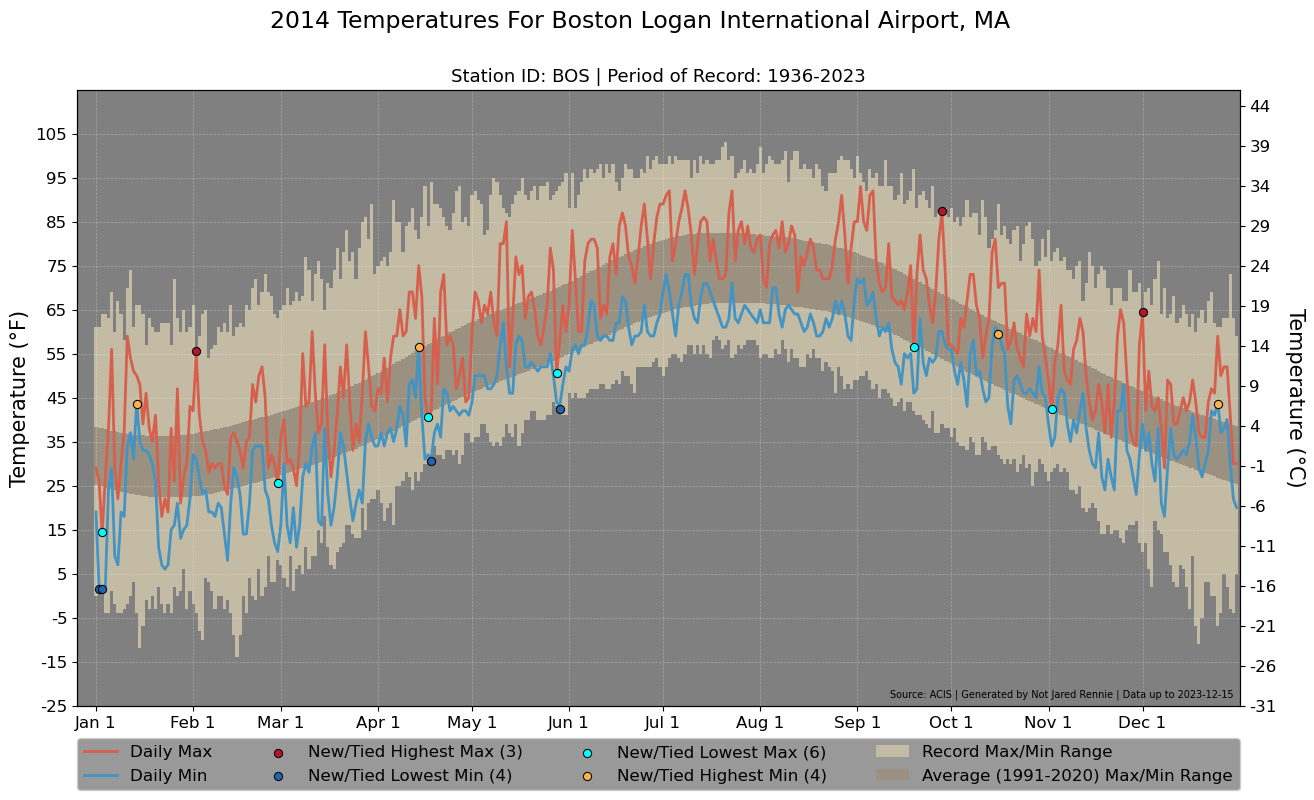

In [10]:
#################################################
# PLOT
print("PLOTTING")

# Set up the plot
fig, axf = plt.subplots(figsize=(15, 8), edgecolor='white', facecolor='white', dpi=100)

# Add grid lines
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.3)
axf.set_facecolor('#808080')

# Plot Record TMAX/TMIN
plt.bar(acisExtremes1['DayOfYear'], acisExtremes1['TmaxVal'] - acisExtremes1['TminVal'], bottom=acisExtremes1['TminVal'], edgecolor='none', color='#c3bba4', width=1, label="Record Max/Min Range")

# Plot Normal TMAX/TMIN
normals_start='1991';normals_end='2020'
plt.bar(normalData['DayOfYear'], normalData['TmaxNormal'] - normalData['TminNormal'], bottom=normalData['TminNormal'], edgecolor='none', color='#9a9180', width=1, label="Average ("+str(normals_start)+"-"+str(normals_end)+") Max/Min Range")

# Plot Raw TMAX/TMIN
plt.plot(plotData['DayOfYear'], plotData['TmaxVal'], linewidth=2, color='#D6604D', label="Daily Max")
plt.plot(plotData['DayOfYear'], plotData['TminVal'], linewidth=2, color='#4393C3', label="Daily Min")

# Plot New Max/Min Records
plt.scatter(highMax['DayOfYear'], highMax['TmaxVal'] + 0.50, s=35, zorder=10, color='#B2182B', alpha=1, edgecolor='black', linewidth=0.75, label="New/Tied Highest Max ("+str(len(highMax))+")")
plt.scatter(lowMin['DayOfYear'], lowMin['TminVal'] - 0.50, s=35, zorder=10, color='#2166AC', alpha=1, edgecolor='black', linewidth=0.75, label="New/Tied Lowest Min ("+str(len(lowMin))+")")
plt.scatter(lowMax['DayOfYear'], lowMax['TmaxVal'] + 0.50, s=35, zorder=10, color='cyan', alpha=1, edgecolor='black', linewidth=0.75, label="New/Tied Lowest Max ("+str(len(lowMax))+")")
plt.scatter(highMin['DayOfYear'], highMin['TminVal'] - 0.50, s=35, zorder=10, color='#FEB24C', alpha=1, edgecolor='black', linewidth=0.75, label="New/Tied Highest Min ("+str(len(highMin))+")")

# Plot Legend
plt.legend(bbox_to_anchor=(0., -.137, 1., -1.02), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=12, facecolor='#808080')

# Set X/Y limits
ymin=int(5 * round(float((min(acisExtremes1['TminVal']) - 10))/5))
ymax=int(5 * round(float((max(acisExtremes1['TmaxVal']) + 10))/5))
plt.ylim(ymin, ymax)
plt.xlim(-5, 366) 

# Plot X-Axis Labels/Ticks
month_pos=[1,32,60,91,121,152,182,213,244,274,305,335]
month_names=["Jan 1","Feb 1","Mar 1","Apr 1","May 1","Jun 1","Jul 1","Aug 1","Sep 1","Oct 1","Nov 1","Dec 1"]
plt.xticks(month_pos, month_names, fontsize=12, color='black')

# Plot Y-Axis Labels/Ticks (Left Side, degF)
plt.yticks(range(ymin, ymax, 10), [r'{}'.format(x) for x in range(ymin, ymax, 10)], fontsize=12, color='black')
plt.ylabel(r'Temperature (°F)', fontsize=15, color='black')

# Plot Y-Axis Labels/Ticks (Right Side, degC)
ymax=int((ymax-32) / 1.8)
ymin=int((ymin-32) / 1.8)
axc = axf.twinx()
y1, y2 = axf.get_ylim()
axc.set_ylim(int((y1-32) / 1.8), int((y2-32) / 1.8))
axc.figure.canvas.draw()
axf.callbacks.connect("ylim_changed", axc)
axc.set_ylabel(r'Temperature (°C)', fontsize=15, rotation=270, labelpad=20,color='black')
axc.set_yticks(range(ymin, ymax, 5), [r'{}'.format(x) for x in range(ymin, ymax, 5)], fontsize=12, color='black')

# Plot Title/Subtitle/Annotations
plt.suptitle(str(plotYear)+' Temperatures For '+stationName+', '+stationState, fontsize=17,color='black')
plt.title('Station ID: '+stationID+' | Period of Record: '+str(stationStart)+'-'+str(stationEnd), fontsize=13,color='black')
plt.annotate('Source: ACIS | Generated by '+author+' | Data up to '+lastDate.strftime('%Y-%m-%d'),xy=(0.995, 0.01), xycoords='axes fraction', fontsize=7,horizontalalignment='right', verticalalignment='bottom')

# Show The Results!
plt.show()

Isn't it beautiful? Congrats! You made an annual temperature graphic! Feel free to post on social media for the world to see!

**Congrats on completing this notebook! Now go forth and make better plots!**

### Some other challenges you could try.
- We are plotting a full year's worth of data. How about multuple years? Or maybe just a season?
- The extreme max/min records assume the full period of record, do we WANT to assume that?
- For each day we are getting the temperature value and it's normal. One could instead plot the anomaly.
- Could this be applied to non-temperature data, such as precipitation?